# Introduction
This [Jupyter](https://jupyter.org/) notebook can be run using [colab.research.google.com](https://colab.research.google.com) (see [here](https://colab.research.google.com/notebooks/intro.ipynb) for an intro) or from [jupyter.org/try](https://jupyter.org/try) (select JupyterLab). Alternatively this source file can be downloaded and run locally with [Anaconda](https://docs.anaconda.com/anaconda/navigator/) or directly with Jupyter (Lab|Notebook). Jupyter and Anaconda should be installed in all AUT engineering and computer science labs. I recommend using a web-interface for portability.

The benefit of using Jupyter is that code snippets can be run live (Python is running in the background).

The version on Github is static; markdown is rendered but code cannot be executed. All code can be copied and pasted into your favourite text editor or IDE and *should* run with Python 3.x ;)

You are encouraged to use any programming language you feel comfortable with, this is simply an example using Python (and Jupyter is designed for Python demonstrations).

---

# Tutorial: Proof of Work - Mining 

**_Proof of work_** is the unique contribution to the Bitcoin protocol that achieves two aims:
1. Allows nodes to verify transactions to achieve consensus. In Bitcoin the longest chain is a representation of the most cumulative proof of computational effort expended to date, and the longest chain is the canonical one. A proof of work verification scheme should be reasonably difficult to compute but easy to verfiy. It is difficult to find a hash (as we will see) but comparatively trivial to validate.
2. Keeps the network secure by aligning incentives. This means it is more profitable to play by the rules than attempt to subvert the network. To earn the block reward your computational effort has to be verified by the network and in a race-condition wasted hashes or time represent lost opportunity cost.

We have seen in the previous tutorials some of the uses of hashing with the `hashlib` library. Because a standard hash function like `sha256` is random, meaning there is no way to game the system or shortcut the output, it allows equal participation from anyone in the network. If one participant chooses to dedicate all of their computers and resources to hashing, then they are allowed more "votes" in the network and will receive proportionally more rewards for their effort.

This whole process is referred to as _mining_ because it is analagous to gold mining.

So lets get mining!

### Prepare a block to be mined
Press `shift-enter` in the cell to run it. You may have to wait for the environment to initialize if this is the first time. There is a status bar above.

The output will appear directly below the code block.

In [1]:
# we will need pickle to turn our block into a byte object
# sha256 operates one byte at a time
import hashlib
import pickle

# create a new block using sample values
block = {   'timestamp': 1553200425.597771,
            'transactions': ['a','b','c'],
            'prev_hash': '00574faf29dbb37a3b12c2f8f5c05cf03c708313d4ad1d5d968cd2438beea104',
            'merkle_root': 'aa0522a507b6499cb3512494908ac9220',
        }

# pickle the block
pickled_block = pickle.dumps(block)
print(pickled_block)

b'\x80\x04\x95\xba\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\ttimestamp\x94GA\xd7$\xfdJfA\xe1\x8c\x0ctransactions\x94]\x94(\x8c\x01a\x94\x8c\x01b\x94\x8c\x01c\x94e\x8c\tprev_hash\x94\x8c@00574faf29dbb37a3b12c2f8f5c05cf03c708313d4ad1d5d968cd2438beea104\x94\x8c\x0bmerkle_root\x94\x8c!aa0522a507b6499cb3512494908ac9220\x94u.'


This block is in byte form (the `'b`) and can now be hashed. Lets see what it looks like.

In [2]:
# hash the block and output a digest of hexidecimal digits
hashed_block = hashlib.sha256(pickled_block).hexdigest()
print(hashed_block)

533f71d73de65feec417737ce40b8cbf7cfe150c81d5703fb28cf07cef0618f1


Every time we hash this same block with sha256 we will get the same unique output. In this case repeated hashing will not change the output. (Why is this important?)

Lets introduce a variable that is added to the block. This variable doesn't change the data in the block, but allows for a different hash output. It is a **number** we will use **once**, then hash, test, update, and hash again. This is called a **nonce**.

This simple example shows how a nonce changes the hash:

In [3]:
# choose 16 because a hex output has 16 digits
for nonce in range(16):
    print(str(nonce)+'_block_nonce')

0_block_nonce
1_block_nonce
2_block_nonce
3_block_nonce
4_block_nonce
5_block_nonce
6_block_nonce
7_block_nonce
8_block_nonce
9_block_nonce
10_block_nonce
11_block_nonce
12_block_nonce
13_block_nonce
14_block_nonce
15_block_nonce


Now output the hash of the above strings:

In [4]:
for nonce in range(16):  
    print(hashlib.sha256((str(nonce)+'block_nonce').encode()).hexdigest())

3dd1f24bf0a4e624a2cb40919297bf1b7d7c5e48b3ca395c6e61ee2ad8f51637
2732ba4727c3a2b9b0244654affb31545168a504193a85ec86e63c37b1752190
22be81a20ce2c6de24d1e95d223290f5cc87c866c02a92f70b0a49c0ec337215
4faa8101f2776b329ae6da3c973b6e74a54e963a110d92f53d7b20a82c38fddc
3e557abe5079371b8eff947c1a5c69982a69c7e2e486d89cd3b979352ac0ee8a
422f4b4bc2e211b4964a79e25c2f23b14dab189693ae9ced01068159857a7c9c
3843b8dc09f93eb2e3b39654486d80ee0f6d3b2cd573554a7ab9ff3397c5b6ed
22ea30afd6c105358926b5f7d72ca6944aaee7c9865d1d50653c5c0159763db9
b5e24d04ae74a1fc754882215e22ceb40a4257910a7fc17b81ae5689f0f8d92e
a287c7cacb668082e4a2eebbb74c65e01019fc8c9e1c43a87f8601de189026fd
b50e1115525a09d3c5ed5015c369b1f3278d5a3289de28c99104b7e9de1d7110
091c41e1694a6cf7da4a3b5df8e9656cec6f118ddb19fa733849270d3d084e8d
76793ad61014322d0bc5d25ff5b60d2f136d7e63cc367032224ee356920c8c19
843f1603f6b8e455ac429bb3d7d298ccb5e68f3c4dec5b7211ae717c721e8e2d
a858f37660f2466f26b167b36017509ccf6a586dc6b354d5c362a32302350e7c
82cba63d49f0f1db07006a833

There should be no pattern to the hashed values above. All that was changed was the nonce. Since a hexidecial number has 16 possible digits (0-9,a-f), there should be a one-sixteenth probability that the first digit of the digest is a `0`. (How many are above?)

What is the probability that the first *two* digits are: `00`? 

$P($ `00` $)=\left(\frac{1}{16}\right)\left(\frac{1}{16}\right)=\frac{1}{16^2}=\frac{1}{256}=0.3906\%$

So the probability the first $n$ digits are `0` is:

$P($ `0` $^n)=\frac{1}{16^n}$

As the number of zeroes increase, the probability of finding a hash with those leading zeroes goes down. If we are looking for a hash with `00` at the beginning this is called the _target difficulty_. Mining a successful block means finding a hash that is below the target value. One way to do this is to take the hash string and compare the first digit(s).

In [15]:
# set the number of leading zeroes
target = 1

# loop through the hashes checking each one
for nonce in range(16):  
    hash = hashlib.sha256((str(nonce)+'block_nonce').encode()).hexdigest()
    print(str(hash))
    
    # check the string up to the indexed difficulty and compare
    # note python string manipulation: '0'*5 = 00000; this is string multiplication
    if hash[:target] == '0'*target:
        print('Block Found!')
        break
        
    # end of range condition
    if nonce == 15: print('Block not found')
    

3dd1f24bf0a4e624a2cb40919297bf1b7d7c5e48b3ca395c6e61ee2ad8f51637
2732ba4727c3a2b9b0244654affb31545168a504193a85ec86e63c37b1752190
22be81a20ce2c6de24d1e95d223290f5cc87c866c02a92f70b0a49c0ec337215
4faa8101f2776b329ae6da3c973b6e74a54e963a110d92f53d7b20a82c38fddc
3e557abe5079371b8eff947c1a5c69982a69c7e2e486d89cd3b979352ac0ee8a
422f4b4bc2e211b4964a79e25c2f23b14dab189693ae9ced01068159857a7c9c
3843b8dc09f93eb2e3b39654486d80ee0f6d3b2cd573554a7ab9ff3397c5b6ed
22ea30afd6c105358926b5f7d72ca6944aaee7c9865d1d50653c5c0159763db9
b5e24d04ae74a1fc754882215e22ceb40a4257910a7fc17b81ae5689f0f8d92e
a287c7cacb668082e4a2eebbb74c65e01019fc8c9e1c43a87f8601de189026fd
b50e1115525a09d3c5ed5015c369b1f3278d5a3289de28c99104b7e9de1d7110
091c41e1694a6cf7da4a3b5df8e9656cec6f118ddb19fa733849270d3d084e8d
Block Found!


Our loop breaks after 12 iterations because we've satisfied the condition; in this case finding a single leading zero.

***

Up to this point we have just been hashing a string `'_block_nonce'`. Lets now use our block.

In [18]:
# !!caution!! - setting difficulty too high could result in waiting until the heat death of the universe to find your block
target = 4 # powers of sixteen
nonce = 1
block_found = False

# this will loop until a block is found
while block_found == False:
    # add a nonce value to the block, here it is prepended
    work = hashlib.sha256(bytes(nonce) + pickled_block)
    
    # check to see if the hash meets the target
    if work.hexdigest()[:target] == '0'*target:
        block_found = True
        
        # output some data
        print('Target Difficulty: ' + str(target))
        print('Nonce: ' + str(nonce))
        print('Proof-of-work: ' + work.hexdigest())
        
    # update the nonce before looping
    # this ensures the block is different before it is hashed again    
    nonce += 1

# Change the difficulty value and compare output (and time)
# you may have to wait 10-20 seconds for output to appear below. 

Target Difficulty: 4
Nonce: 67220
Proof-of-work: 00003927c8d89164725943089548e9f743623463c2e4fca55e32ba202b46ea45


The nonce indicates how many times the loop was run which is how many `SHA-256` hashes were calculated. When you hear people say that bitcoin mining involves "solving complex puzzles" this is what they are referring to. Sidebar: these **aren't puzzles at all!** It is simply an algorithm to manipulate bits and compare to a target condition.

```python
Target Difficulty: 4
Nonce: 102591
Proof-of-work: 0000ee2830b3999eec469cc16a81f0eb6a163e84ece694803adaf3392b74804b
```

Above I set the difficulty to 4 and can see that the hash was calculated 102,591 times before meeting the condition.

### Add a system timer for analysis

Change the difficulty value above and compare the different outputs. Adding a timer can help with the comparison.

In [168]:
target = 4
nonce = 1
block_found = False

# access the system clock and record the start time
import time
start = time.time()
while block_found == False:
    work = hashlib.sha256(bytes(nonce) + pickled_block)
    if work.hexdigest()[:target] == '0'*target:
        end = time.time()
        block_found = True
        print('Target Difficulty: ' + str(target))
        print('Nonce: ' + str(nonce))
        print('Proof-of-work: ' + work.hexdigest())
        
        # calculate and print the time; this will output in seconds
        print('Elapsed time: ' + str(end - start))
    nonce += 1

Target Difficulty: 4
Nonce: 67220
Proof-of-work: 00003927c8d89164725943089548e9f743623463c2e4fca55e32ba202b46ea45
Elapsed time: 1.5226671695709229


### Generate random blocks

Re-running this will take similar times because we keep hashing the same block with the same nonce. In practice, once a block is found, the miners start mining the next block which contains different transactions. Introducing some random bytes into our block can help you with generating "new" blocks to analyse mining and difficulty performance.

In [169]:
# secrets provides access to a secure random number generator. 
# Refer to documentation for what this means. 
# Always be cautious when generating random data for important purposes like keys.
import secrets
# generate random data to append to a block
random_data = secrets.token_bytes(4)

target = 4
nonce = 1
block_found = False
start = time.time()
while block_found == False:
    # the block now contains 4 random bytes of data
    work = hashlib.sha256(bytes(nonce) + pickled_block + random_data)
    if work.hexdigest()[:target] == '0'*target:
        end = time.time()
        block_found = True
        print('Target Difficulty: '+ str(target))
        print('Nonce: ' + str(nonce))
        print('Proof-of-work: ' + work.hexdigest())
        print('Elapsed time: ' + str(end - start))
    nonce += 1

Target Difficulty: 4
Nonce: 30609
Proof-of-work: 000007d2da2eaddb315599405744401268efd8249075684a0e72db85e2de2ad8
Elapsed time: 0.37720823287963867


These results should be fresh. Every time you run this block or access `secrets.token_bytes(4)` the block will change.

Compare results I just got:
```
Target Difficulty: 4
Nonce: 67220
Proof-of-work: 00003927c8d89164725943089548e9f743623463c2e4fca55e32ba202b46ea45
Elapsed time: 1.3762462139129639

Target Difficulty: 4
Nonce: 1081
Proof-of-work: 0000dd3a5dd67cbf15d5f3670e5d08f029a9f37922fd21bb573244856e0411db
Elapsed time: 0.0
```

This shows the lottery-like nature of using hash functions and target difficulty values. The second set found a proof-of-work in 0.00 s and the first one took 1.3762 s!

---

## Target In Bitcoin
The formula to calculate the difficulty target is given by,

$\text{target} = \text{coefficient} \times 2^{8 \times (\text{exponent} -3)}$

We can see the block contains the target information in the [Bitcoin Office](https://bitcoin.gob.sv/block/). See below,
```
Version	0x20190000
Bits	0x17033d76
Merkle root a35140ddab3a1ae4ea5cd3b6289605ae794f7b944c2a153406a7d332caea3613
```
The target is notated as 'bits' and has value '0x17033d76' in Block 856861. In this case, exponent is '0x17' and the coefficient is '0x033d76' 

In [162]:
co = 0x033d76
ex = 0x17
target = co * 2 ** (8 *(ex - 0x3))

print(target)
print(hex(target))

num_zeros = 64 - len(hex(target)[2:])
target = '0x'+'0'*num_zeros + hex(target)[2:]

print(num_zeros)
print(target)

310338180674118587457206844748640968959780028040609792
0x33d760000000000000000000000000000000000000000
19
0x000000000000000000033d760000000000000000000000000000000000000000


## Probability
As more miners come online to try to earn coins (and process transactions) the difficulty must adjust to maintain the blocktime. Without this difficulty adjustment the group with the most hashpower would have already mined all the available coins in any proof of work network, likely causing the value to crash.

The difficulty set in this tutorial goes up by powers of 16; there is a sixteen-fold increase in time expected to find a block as the leading zeroes go from `0000` to `00000`. (Try with 5 or 6 and see how long you have to wait.) What if you want difficulty to increase only by a factor of two? (See exercise #1)

Lets look at the probability of finding a block.

In [21]:
# one leading zero to start
diff = 1
prob = 1/16
print(prob)

0.0625


In [22]:
diff = 2
prob = 1/(16**diff)
print(prob)

0.00390625


In [23]:
#loop through a range and print the results
#range(start,stop,step)
for diff in range(1,16,1):
  prob = 1/(16**diff)
  #formatted to show the relative value
  print("%.20f" % prob)

0.06250000000000000000
0.00390625000000000000
0.00024414062500000000
0.00001525878906250000
0.00000095367431640625
0.00000005960464477539
0.00000000372529029846
0.00000000023283064365
0.00000000001455191523
0.00000000000090949470
0.00000000000005684342
0.00000000000000355271
0.00000000000000022204
0.00000000000000001388
0.00000000000000000087


In [24]:
#same as above only stored in an array (python list) to plot
prob=[]
for diff in range(1,11,1):
  prob.append(1/(16**diff))
print(prob)


[0.0625, 0.00390625, 0.000244140625, 1.52587890625e-05, 9.5367431640625e-07, 5.960464477539063e-08, 3.725290298461914e-09, 2.3283064365386963e-10, 1.4551915228366852e-11, 9.094947017729282e-13]


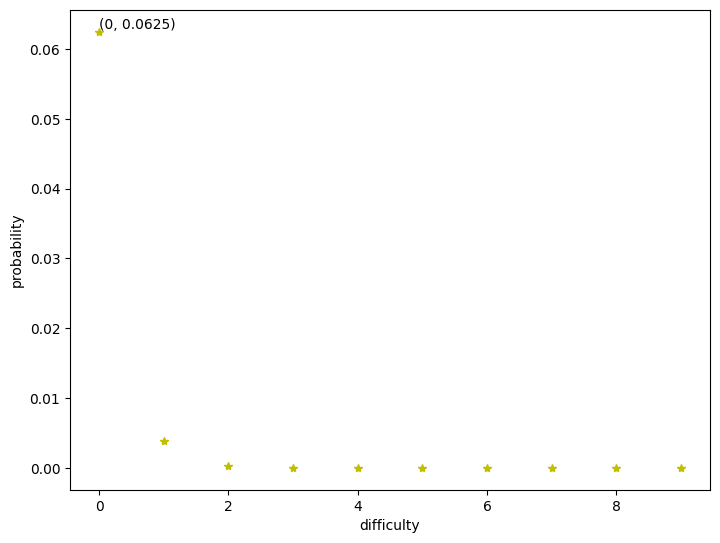

In [43]:
#plot using matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('difficulty')
ax.set_ylabel('probability')
ax.plot(prob,'y*')

ax.text(0, prob[0], f'{(0, prob[0])}', ha='left', va='bottom')
plt.show()



This shows the probability for a single hash to reach our target difficulty: a 6.25% chance to find 1-leading zero. 

The proof of work for Bitcoin block 801276 was:
`00000000000000000001a5455150df515b3d5900a6320ca46a821d5e046c5530`

This has 19 leading zeroes! To increase your odds you can (a) use a faster processor (b) use more processors in parallel.

---

## Difficulty
Up to this point we have used the term target difficulty to mean the number of leading bits that are zero in a hexidecimal format. When looking up difficulty on the [web](http://bitcoin.sipa.be/) you will get a different value, for example: the difficulty when the above block was mined was `86,871,474,313,762.00` (86.87 trillion).

What does this mean? Lets use a smaller set for analogy. Suppose the set size was 100; all integers between 0 and 100 are valid possibilities in our lottery. If the target is set at 5, then any number less than 5 is a winner: 0,1,2,3,4. 
Now, the formula for difficulty is:

$\text{difficulty}=\frac{\text{set size}}{\text{target}}$

so, $\text{difficulty}=\frac{100}{5}=20$. You can think of this as the number of attempts to "find" a number less than 5.

The difficulty is a measure of how many times you need to attempt the lottery to get a winner, as a statistical measure, over time.


In [163]:
# calculate bitcoin's difficulty
# the maximum target value which was set for the very first block
# 0x00000000ffff0000000000000000000000000000000000000000000000000000 (in hex)
set_size = 0x00000000ffff0000000000000000000000000000000000000000000000000000
print(set_size)
# print(set_s)

26959535291011309493156476344723991336010898738574164086137773096960


.\
.\
.\
pause for a moment here to reflect on how big this number is :)\
.\
.\
.

In [164]:
# recently found block's proof of work (copied from web for block 856861)
target = 0x000000000000000000033d760000000000000000000000000000000000000000
# print in decimal
print(target)


310338180674118587457206844748640968959780028040609792


You can access the recent block's proof of work in the [Bitcoin Office](https://bitcoin.gob.sv/block/) 

In [165]:
# calculate difficulty value
difficulty = set_size / target
print(difficulty)

86871474313761.95


# Summary

In this tutorial we have:<br>
 - added a nonce to our block
 - hashed blocks until they meet a difficulty requirement
 - investigated probabilities using `matplotlib`
 - defined and calculated difficulty
 
What we have __not__ done is:<br>
 - set a target value that is not a power of 16
 - dynamically adjusted target values
 - appended mined blocks to a chain
 
Python libraries that this code depends on:
 - [hashlib](https://docs.python.org/3/library/hashlib.html)
 - [pickle](https://docs.python.org/3/library/pickle.html)
 - [secrets](https://docs.python.org/3/library/secrets.html)
 - [time](https://docs.python.org/3/library/time.html)

Useful links:
 - [hex to decimal converter](https://www.rapidtables.com/convert/number/hex-to-decimal.html)
 - [matplotlib quick tutorial](https://www.tutorialspoint.com/matplotlib/matplotlib_quick_guide.htm)
 - [bitcoin difficulty](https://en.bitcoin.it/wiki/Difficulty)

 ---

# Exercises

1. Mining difficulty is not only represented by leading zeroes (powers of 16) but by a value (hex number) that is recalculated every 2016 blocks (in Bitcoin). Write a script demonstrating simplified proof-of-work, using
```python
if hash < target: block_found = True
```
and run your simplified proof-of-work in two different difficulties.

2. Write a script to modify the difficulty every time a block is found faster than expected (increase difficulty) and readjusts if a block is found slower than expected (decrease difficulty).

3. Calculate the hashpower of your PC and estimate how long it would take to find a block in the [present bitcoin network](https://bitinfocharts.com/comparison/bitcoin-hashrate.html).

4. Can you have a proof of work blockchain with a realtime difficulty adjustment? What are some of the advantages of this setup? Limitiations?